In [13]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
from skimage import img_as_ubyte

# A command line argument.
input_name = "C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1425-002.JPG"





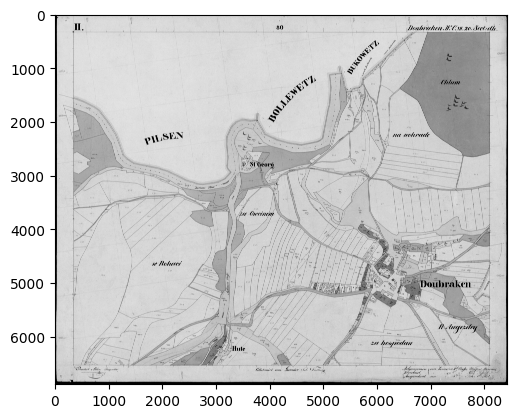

In [14]:
# It reads the image from the file.
img = cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
# A Canny edge detector.
# img = cv2.Canny(img, 1, 500)
# Creating the kernel(2d convolution matrix)
kernel1 = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])
  
img = img[:,:,0]

plt.imshow(img, cmap="gray")

In [15]:
img = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
assert img is not None, "file could not be read, check with os.path.exists()"


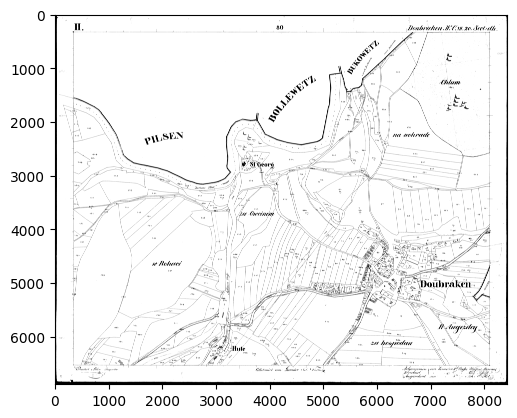

In [16]:

ret, thresh1 = cv2.threshold(img,100,155,cv2.THRESH_OTSU)

plt.imshow(thresh1, cmap="gray")

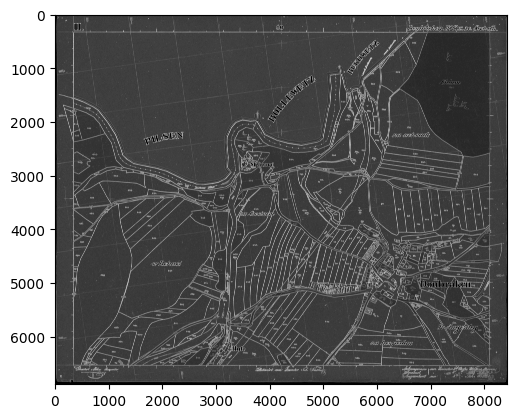

In [17]:
sauvola = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
assert img is not None, "file could not be read, check with os.path.exists()"
sauvola = threshold_sauvola(img, window_size=9, k=0.9)

plt.imshow(sauvola, cmap="gray")

In [18]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

In [19]:
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]


68 6814 84 8337
(6883, 8422)


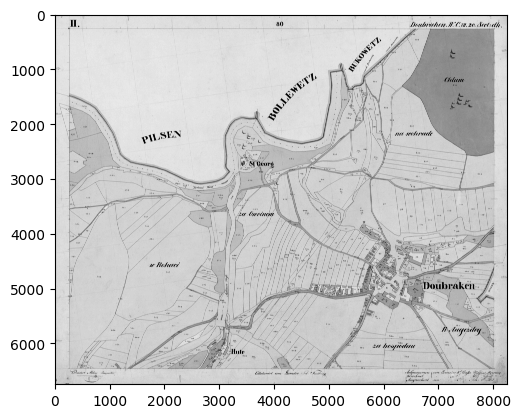

In [20]:
plt.imshow(img, cmap='gray')

In [21]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)
# top_border = top_border.astype(int)
# top_border = img_as_ubyte(top_border)
print(top_border[:5])

(674, 8253)
[[200 199 197 ... 175 179 177]
 [200 199 199 ... 178 180 185]
 [197 199 202 ... 181 182 184]
 [193 197 202 ... 176 177 176]
 [194 196 197 ... 180 179 178]]


In [22]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def make_line_detection(border):
    # Create default parametrization LSD
    lsd = cv2.createLineSegmentDetector(0)

    # Detect lines in the image
    lines = lsd.detect(border)[0]  # Position 0 of the returned tuple are the detected lines
    lines = np.squeeze(lines)
    distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])
    longest_line_index = np.argpartition(distances, -20)[-20:]
    print(longest_line_index)
    print(distances.shape)
    plt.plot(np.arange(0, len(distances)), distances)
    plt.show()
    longest_lines = lines[longest_line_index]
    longest_lines = longest_lines.astype(int)
    print(longest_lines)

    # Draw detected lines in the image
    for i in longest_lines:
        border = cv2.line(border, (i[0], i[1]), (i[2], i[3]), (255,0,0),20)
    print(border.shape)
    # It converts the image from BGR to grayscale.
    # drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
    plt.imshow(border, cmap='gray')
    # return border

[ 605  301  898  276  506  651  493  420 1032 1136 1028  445  334  200
  120  230  944  275  217  351]
(2522,)


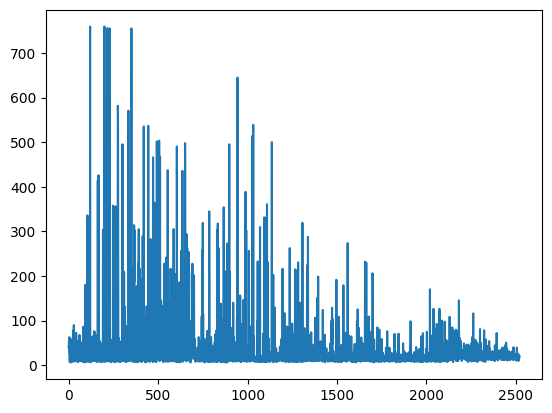

[[ 102 5636  569 5485]
 [  84 3187  569 3088]
 [ 568 3092   83 3191]
 [ 566 4542    0 4565]
 [   0 4722  502 4762]
 [   1 3218  494 3146]
 [ 500 4765    0 4725]
 [ 533 4687    0 4634]
 [ 571 1198  569  659]
 [ 574 4664  368 5119]
 [   0 4561  514 4542]
 [   0 4631  534 4684]
 [   0 4536  570 4502]
 [  54 3210  153 3962]
 [ 232 3199  328 3952]
 [ 364 3172  469 3920]
 [  10 4472  476 4026]
 [ 326 3954  251 3378]
 [ 149 3959   50 3210]
 [ 466 3920  360 3173]]
(6746, 826)


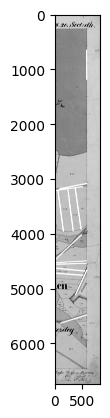

In [23]:
make_line_detection(right_border)

[113  89 121  27 143 240 226 319 230 823 133 148 147  47 178  54 217 106
  78 105]
(1649,)


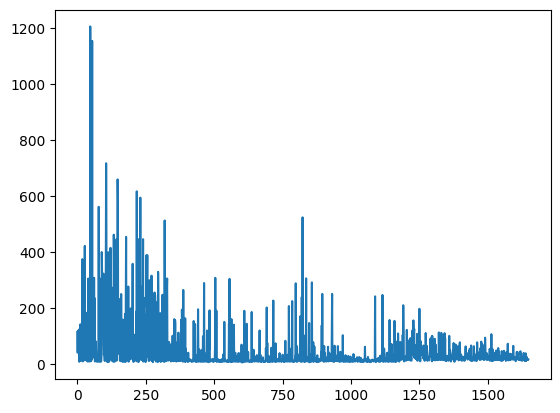

[[ 264 1494  629 1654]
 [ 333 4625  501 4262]
 [ 425 2277  823 2162]
 [ 328 4733  287 5152]
 [ 273 3318  590 3006]
 [ 591 4077  788 3678]
 [ 623 3839  263 3575]
 [ 730 1706  268 1484]
 [ 256 5833  258 5239]
 [ 268 1467  740 1693]
 [ 786 3674  481 4020]
 [ 824 2168  267 2319]
 [ 263 5178  259 5836]
 [ 261  274  262 1479]
 [ 261 3570  627 3838]
 [ 786 3674  300 4720]
 [ 255 6456  256 5840]
 [ 717 1708  267 1495]
 [ 823 3502  265 3556]
 [ 261 2314   70 1623]]
(6746, 825)


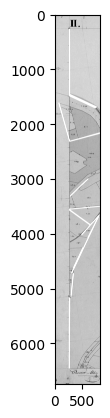

In [24]:
make_line_detection(left_border)

[625 734 634 491 581 460 534 535 545 524 555 706 523 521 608 506 481 938
 626 513]
(1409,)


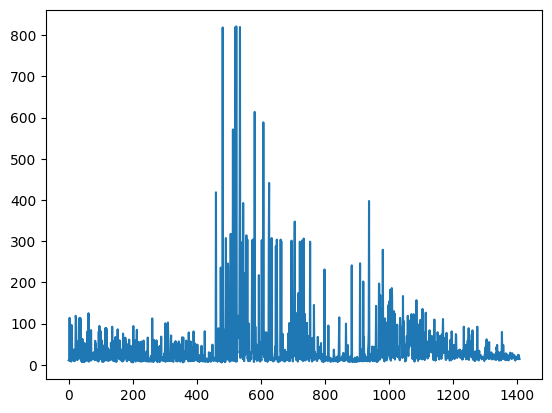

[[6143  268 6449  268]
 [4594  266 4900  267]
 [2426  264 2734  264]
 [7071  268 7379  268]
 [5215  268 5829  267]
 [6702  672 6839  276]
 [2971  264 3351  265]
 [4615  270 3795  269]
 [ 250  279  250  671]
 [2143  268 1321  268]
 [6422  458 6191  670]
 [6820  343 6707  672]
 [3793  269 2971  268]
 [2966  268 2146  268]
 [6119  669 6550  269]
 [6185  670 6419  455]
 [5439  271 4620  271]
 [ 271  671  271  274]
 [1316  267  875  267]
 [6013  271 5441  271]]
(674, 8253)


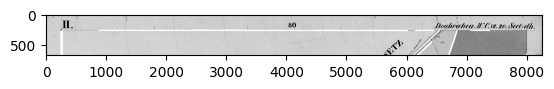

In [25]:
make_line_detection(top_border)

[1284  609  392  336  457  338 1737 1123  980  653  602  585  697  438
  952  704  333  268 1586 1773]
(3774,)


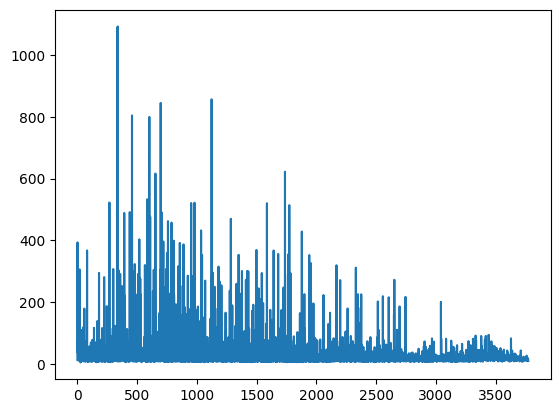

[[5509  397 5979  395]
 [ 835  185 1298  299]
 [5981  367 5493  354]
 [5991  250 7080  286]
 [5995  143 5191  112]
 [7082  289 5991  254]
 [2025  255 2591   -2]
 [6324  397 7180  396]
 [4371  397 4711    1]
 [3966  399 3350  397]
 [5198  109 5996  140]
 [1337  124  816    8]
 [6008   59 6851  102]
 [5493  351 5984  363]
 [4716    1 4377  396]
 [4909  372 5229    0]
 [6971  109 6194   73]
 [ 820    6 1331  119]
 [5233   -1 4895  394]
 [2567   15 2098  226]]
(675, 8253)


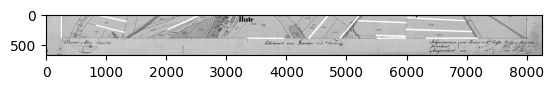

In [26]:
make_line_detection(bottom_border)
